#A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.

# Problem Statement 
A retail store ‘Walmart’ that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply. Walmart retail stores is witnessing the issue of supply and demand within the economy.  You have to come up with useful insights using the data  and making the predictions for forecasting the sales for the specified number of weeks 

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
data = pd.read_csv('Walmart DataSet.csv') 

# Project Objective 
 The objective of this project is to examine the relationship between weekly sales, unemployment rate, and consumer price. Additionally, the project analyses the top-performing and the worst-performing stores. Further, through the use of the predictive modelling approach would be used for predicting the sales of next 12 weeks. 


# Data Description 	
Within this dataset , there are historical sales data for 45 Walmart stores which are based  on the  store and the week . Certain set of events and holidays are impacting the sales of each week. The business is facing a challenge due to unforeseen demands and runs out of stock some times. 


In [5]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Data Processing,  Steps, and Inspiration 
The data preprocessing incorporates the following steps:- 
1.)	Cleaning of the Data – This includes removal of missing values, outliers and any kind of inconsistencies within the dataset. 
2.)	Exploration of Data – Exploration of the data for gaining insights and understanding the data 
3.)	Data Visualization: - Visualizing  the data for a better understanding 

In [8]:
data.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [9]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
data.shape

(6435, 8)

a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?

In [5]:
data['Unemployment'].fillna(data['Unemployment'].mean(), inplace = True)

In [7]:
from  scipy.stats  import mstats

In [8]:
data['Weekly_Sales'] = mstats.winsorize(data['Weekly_Sales'], limits=[0.05, 0.05])

In [9]:
import matplotlib.pyplot as plt 

In [10]:
import seaborn as sns 

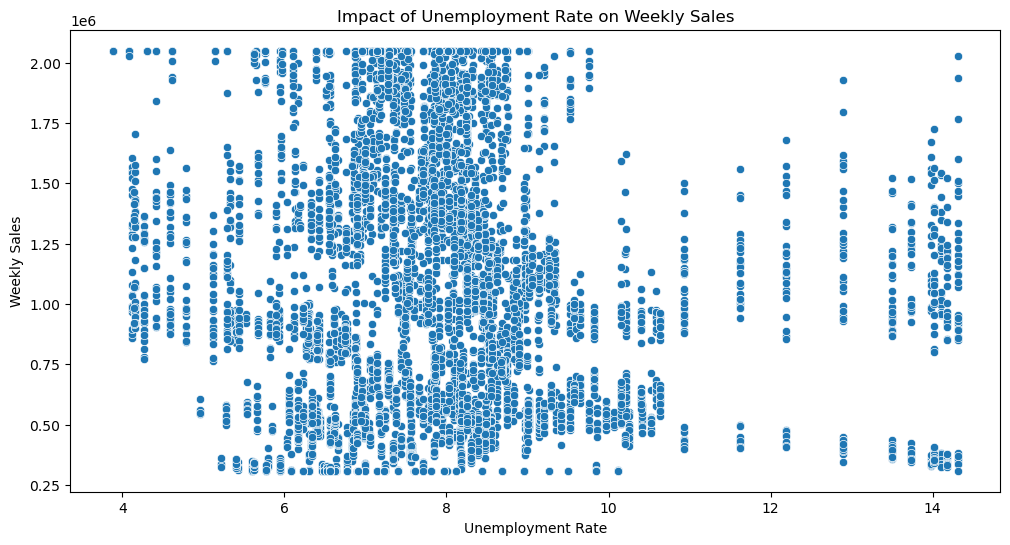

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(x ='Unemployment' , y = 'Weekly_Sales', data=data)
plt.title('Impact of Unemployment Rate on Weekly Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
X = data[['Unemployment']]
y = data['Weekly_Sales']
model = LinearRegression().fit(X, y)
print('Regression Coefficients:', model.coef_)

Regression Coefficients: [-29625.16799757]


In [14]:
data['Predicted_Weekly_Sales'] = model.predict(X)
data['Sales_Difference'] = data['Predicted_Weekly_Sales'] - data['Weekly_Sales']
stores_most_affected = data.groupby('Store')['Sales_Difference'].mean().sort_values().head(5)
print('Stores Suffering the Most:\n', stores_most_affected)

Stores Suffering the Most:
 Store
20   -943690.822261
14   -911140.835906
4    -894751.632684
13   -878885.398248
2    -836067.965578
Name: Sales_Difference, dtype: float64


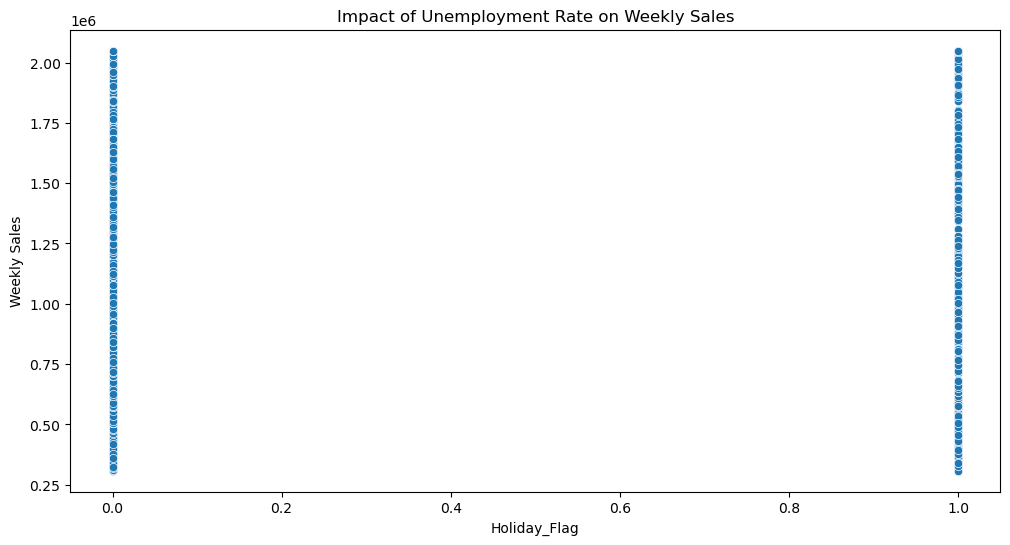

In [15]:
plt.figure(figsize=(12,6))
sns.scatterplot(x ='Holiday_Flag' , y = 'Weekly_Sales', data=data)
plt.title('Impact of Unemployment Rate on Weekly Sales')
plt.xlabel('Holiday_Flag')
plt.ylabel('Weekly Sales')
plt.show()

b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [ ]:
##The seasonal trend could be due to the temperature and the holiday week

c. Does temperature affect the weekly sales in any manner?

In [16]:
from scipy.stats import pearsonr

In [17]:
sales_and_temp = data[['Weekly_Sales', 'Temperature']]

# Calculate the Pearson correlation coefficient

corr, _ = pearsonr(sales_and_temp['Temperature'], sales_and_temp['Weekly_Sales'])

# Interpret the result
if corr > 0:
    print("Temperature has a positive correlation with weekly sales.")
elif corr < 0:
    print("Temperature has a negative correlation with weekly sales.")
else:
    print("Temperature does not have a significant correlation with weekly sales.")

Temperature has a negative correlation with weekly sales.


In [18]:
c = np.corrcoef(data['Weekly_Sales'],data['Temperature'])
c

array([[ 1.        , -0.04887378],
       [-0.04887378,  1.        ]])

In [19]:
import matplotlib.pyplot as plt 

In [20]:
import seaborn as sns 

C:\Users\divya\AppData\Local\Temp\ipykernel_267908\823854615.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


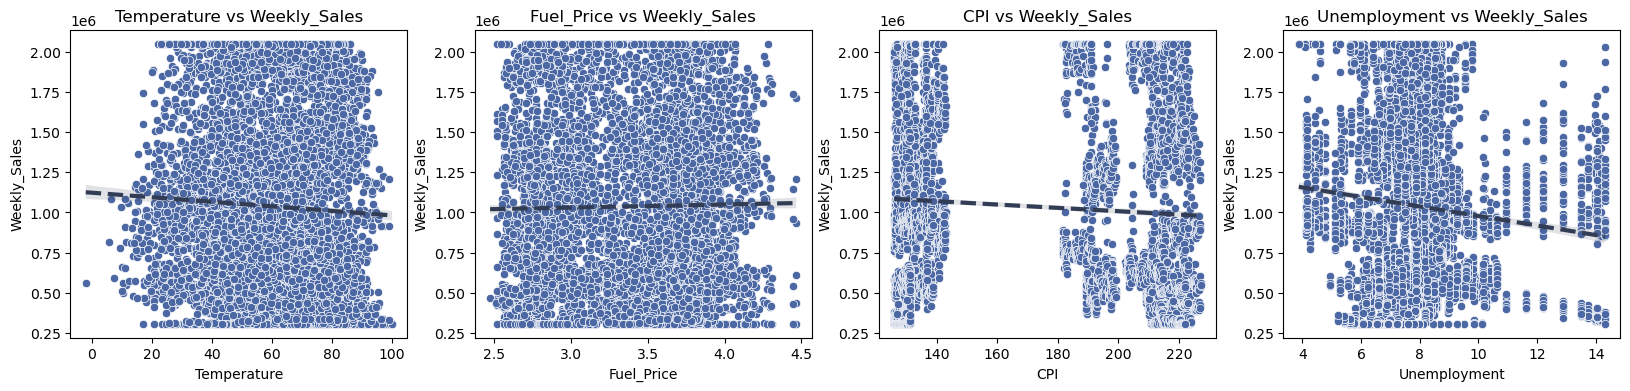

In [21]:
fig , ax = plt.subplots(1, 4, figsize=(20, 4))
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for i, col in enumerate(cols):
  sns.scatterplot(data, y='Weekly_Sales', x=col, ax=ax[i], color = '#4B68A4')
  sns.regplot(data, y='Weekly_Sales', x=col, ax=ax[i], scatter=False, color='#323D55', line_kws={'linewidth': 3, 'linestyle': '--'})
  ax[i].set_title(f'{col} vs Weekly_Sales')
fig.show()

In [22]:
from sklearn.linear_model import LinearRegression

d. How is the Consumer Price index affecting the weekly sales of various stores?

In [23]:

A = data[['CPI']]
B = data['Weekly_Sales']
model = LinearRegression().fit(A, B)
print('Regression Coefficients:', model.coef_)

Regression Coefficients: [-1037.32109534]


 #Top performing stores according to the historical data
 

In [24]:
total_sales_per_store = data.groupby('Store')['Weekly_Sales'].sum()

In [27]:
total_sales = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [28]:
total_sales_sorted = total_sales.sort_values(by='Weekly_Sales', ascending=False)

In [29]:
top_performing_stores = total_sales_sorted.head(10)  # Displaying top 10 stores


In [30]:
print(top_performing_stores)

    Store  Weekly_Sales
19     20  2.858422e+08
3       4  2.848033e+08
12     13  2.781408e+08
13     14  2.757763e+08
1       2  2.693827e+08
9      10  2.634824e+08
26     27  2.504423e+08
5       6  2.220238e+08
0       1  2.218436e+08
38     39  2.061053e+08


#The worst performing store, and how significant is the difference between the
highest and lowest performing stores.


In [13]:
total_sales = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [14]:
total_sales_sorted = total_sales.sort_values(by = 'Weekly_Sales', ascending = True)
                                             

In [33]:
worst_performing_store = total_sales_sorted.head(1)
print(worst_performing_store)

    Store  Weekly_Sales
32     33   44168310.49


In [15]:
best_performing_store_sales = total_sales_sorted.iloc[0]['Weekly_Sales']

In [16]:
worst_performing_store_sales = total_sales_sorted.iloc[-1]['Weekly_Sales']

In [18]:
difference = best_performing_store_sales - worst_performing_store_sales
print("Difference between the highest and lowest performing stores:", difference)

Difference between the highest and lowest performing stores: -264237570.49999997


#Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks

# Choosing the Algorithm for the Project
The choice of the algorithms for the machine learning project depends on the type of the problem. For examining the relationship, linear regression and correlation is used. For the purpose of forecasting  the ARIMA model. ARIMA  is the widely used time series forecasting model. 


In [34]:
from statsmodels.tsa.arima.model import ARIMA 

In [35]:
import matplotlib.pyplot as plt

In [36]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Predicted_Weekly_Sales,Sales_Difference
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,1.033444e+06,-610247.341964
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,1.033444e+06,-608513.881964
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,1.033444e+06,-578524.611964
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,1.033444e+06,-376284.031964
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,1.033444e+06,-521363.121964
...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,1.016320e+06,303146.260934
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,1.016824e+06,283368.768790
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,1.016824e+06,282359.478790
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,1.016824e+06,298698.308790


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Store                   6435 non-null   int64  
 1   Date                    6435 non-null   object 
 2   Weekly_Sales            6435 non-null   float64
 3   Holiday_Flag            6435 non-null   int64  
 4   Temperature             6435 non-null   float64
 5   Fuel_Price              6435 non-null   float64
 6   CPI                     6435 non-null   float64
 7   Unemployment            6435 non-null   float64
 8   Predicted_Weekly_Sales  6435 non-null   float64
 9   Sales_Difference        6435 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 502.9+ KB


In [38]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [39]:
data.set_index('Date', inplace = True)

In [40]:
store_id =1 

In [41]:
store_data = data[data['Store'] == store_id]['Weekly_Sales']

# Assumptions 
It is not possible to accurately forecast the sales for each store for the next 12 weeks using machine learning without additional information. Machine learning algorithms require data to be able to make predictions. This data could include historical sales data, customer demographics, store location, and other factors. Without this data, it is not possible to accurately forecast sales for each store for the next 12 weeks.


# Model Evaluation and Techniques 
The most accurate way to forecast sales for each store using machine learning is to use a time series forecasting model. This type of model takes into account the historical sales data for each store and uses it to predict future sales. The model can be trained using a variety of techniques, such as neural networks. Once the model is trained, it can be used to make predictions about future sales for each store. Additionally, the model can be evaluated using a variety of metrics.

In [42]:
model = ARIMA(store_data, order = (1,1,1))
model_fit = model.fit()

C:\Users\divya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\divya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\divya\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\divya\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [43]:
forecast = model_fit.forecast(steps=12)

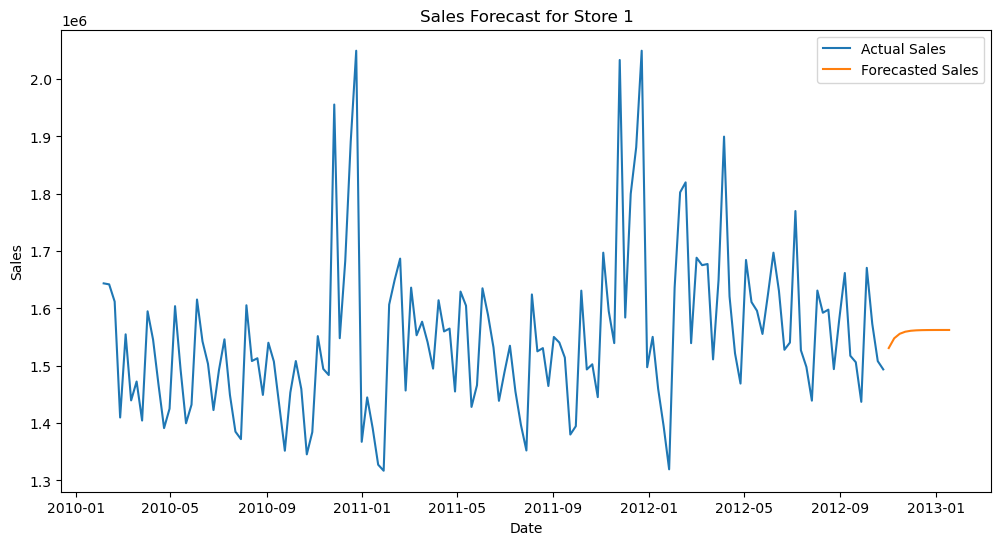

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(store_data.index, store_data, label='Actual Sales')
plt.plot(forecast.index, forecast, label='Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title(f'Sales Forecast for Store {store_id}')
plt.legend()
plt.show()

# Inferences from the Same
Walmart can use machine learning to forecast sales for each store. By leveraging historical sales data, Walmart can use predictive analytics to identify patterns and trends in sales and use them to make accurate predictions about future sales. Walmart can also use machine learning to identify factors that influence sales, such as weather, seasonality, and customer demographics. By incorporating these factors into their forecasting models, Walmart can make more accurate predictions about future sales.





# Future Possibilities of the Project
The sales for each store can be forecasted using machine learning algorithms such as regression, decision trees, and neural networks. These algorithms can be used to predict the sales for each store based on historical data, such as sales figures from previous years, customer demographics, and other factors. The predictions can then be used to inform decisions about inventory, pricing, and marketing strategies. Additionally, the predictions can be used to identify trends and opportunities for growth.

